# WEEK 06 - Algorithms II

## Learning objectives

- Consolidating concepts of algorithmic implementation as well as procedural programming
- Getting comfortable implementing real-world algorithms using Python
- Getting familiar with one of the most important algorithms of all time: Fourier transform

## Overview

In this tutorial, I am going to discuss one of the most important algorithms of all time and one of my personal favorite algorithms: The Fourier transform. For those of you who are not familiar with the in-depth workings of the Fourier analysis or need a freshening up in your knowledge, we are going to describe the algorithm ground up, starting with the Fourier series and the continuous integral formulation and moving to the discrete Fourier transform, which is more suitable to computation, and for those who are more experienced with the basics, we are going to delve into the details of the implementation of the discrete Fourier transform as well as the extremely important fast Fourier transform (FFT).

## The Fourier series

The Fourier series is a good entry point to Fourier analysis, and essentially rewrites a periodic function using an infinite series of sines and cosines of increasingly higher frequencies. Let us unpack that statement. The function $f(x)$ to be rewritten has to be periodic over a given domain, meaning that it would repeat infinitely in both directions. We are going to see later how the Fourier transform is essentially a way to overcome this limitation.

Given a real-valued function $f(x)$, periodic between $-\pi$ and $\pi$, the Fourier series can be written as

\begin{equation}
f(x) = \sum_{k=-\infty}^{\infty} a_{k} \text{cos}(kx) + b_{k}\text{sin}(kx),
\end{equation}

where the coefficients $a_{k}$ and $b_{k}$ can be computed using

\begin{equation}
a_{k} = \frac{1}{||\text{cos}(kx)||^{2}} <f(x), \text{cos}(kx)> = \frac{1}{2 \pi} \int_{-\pi}^{\pi} f(x) \text{cos}(kx) dx,
\end{equation}

\begin{equation}
b_{k} = \frac{1}{||\text{sin}(kx)||^{2}} <f(x), \text{sin}(kx)> = \frac{1}{2 \pi} \int_{-\pi}^{\pi} f(x) \text{sin}(kx) dx,
\end{equation}

where $<f(x), g(x)> := \int_{a}^{b} f(x)g(x) dx$ is the inner product of functions $f(x)$ and $g(x)$ and $||g(x)|| = \int_{a}^{b} g(x) dx$ is the norm of function $g(x)$. Note how the Fourier series can be seen as a change of basis to the infinite-dimensional space of orthogonal bases $\text{sin}(kx)$ and $\text{cos}(kx)$. Convince yourself that $\text{sin}(kx)$ and $\text{cos}(kx)$ form an orthogonal basis $\psi_{k}$, i.e., $<\psi_{i}, \psi_{j}> = 0 \; \forall \; i \ne j$. Given that $\text{cos}$ and $\text{sin}$ are even and odd functions, respectively, the Fourier series can be written as

\begin{equation}
f(x) = \frac{a_{0}}{2} + \sum_{k=1}^{\infty} a_{k} \text{cos}(kx) + b_{k}\text{sin}(kx),
\end{equation}

where the coefficients $a_{k}$ and $b_{k}$ can be computed using

\begin{equation}
a_{k} = \frac{1}{||\text{cos}(kx)||^{2}} <f(x), \text{cos}(kx)> = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \text{cos}(kx) dx,
\end{equation}

\begin{equation}
b_{k} = \frac{1}{||\text{sin}(kx)||^{2}} <f(x), \text{sin}(kx)> = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \text{sin}(kx) dx,
\end{equation}

You may have already noticed traces of Euler's formula and complex numbers creeping in by looking at the form of the Fourier series above, and it is indeed natural to write the Fourier series for complex-valued functions. The Fourier series can be written more generally for a complex L-periodic function $f(x)$ as

\begin{equation}
f(x) = \sum_{k = -\infty}^{\infty} c_{k} e^{\frac{ik 2 \pi x}{L}},
\end{equation}

where the complex Fourier coefficients $c_{k}$ are given as

\begin{equation}
c_{k} = \frac{1}{L}<f(x), \psi_{k}> = \frac{1}{L}\int_{0}^{L}f(x)e^{\frac{-ik 2\pi x}{L}}dx.
\end{equation}

Note that $e^{\frac{ik \pi x}{L}} = \text{cos}(\frac{k \pi x}{L}) + i\text{sin}(\frac{k \pi x}{L})$ using Euler's formula.

Convince yourself that the functions $\psi_{k} = e^{\frac{-ik 2\pi x}{L}}$ form an orthogonal basis, i.e., $<\psi_{i}, \psi_{j}> = 0 \; \forall \; i \ne j$.

We are going to code up the Fourier series. However, before we can do that there two hurdles that have to be addressed. First, are the infinity signs in the summation above. Computers do not like infinity; therefore, we will curtail the infinite series up to a given accuracy. This truncation leads to the Fourier series **approximation**, and we will see that the approximation becomes more accurate as we add higher and higher frequencies to our finite series. The second issue is the computation of the integral for the Fourier coefficients, which needs to be done numerically. Here, we will simply use the trapezoidal rule.

**Hints**:

- The function we are going to use as an example is a simple hat function, which is real valued; therefore, you can use the real version of the Fourier series above in order to simplify your computations
- Furthermore, since we are going to necessarily truncate the series up to a given number of frequencies, it helps to use the version that rewrites the series from $0-\infty$ instead of the original $-\infty-\infty$
- Use the trapezoidal rule to calculate the integral simply as $\int_{0}^{L} f(x) dx \approx \sum_{n = 0}^{N - 1} f(x_{i}) \Delta x$, where $x_{i}$ are discrete locations over the integration domain, spaced $\Delta x$ apart from each other

In [1]:
%matplotlib inline

Text(0.5, 1.0, 'Hat function')

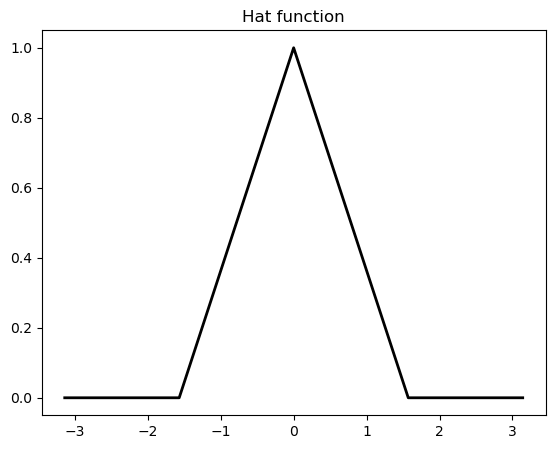

In [96]:
import math
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6.5,5))
# Sampling resolution
dx = 0.001
# Data length
n = int(2 * math.pi / dx)
# Sampling points
x = [-1 * math.pi + i * dx for i in range(0, n)]
hat_length = int(n/4)

# Create hat function
f = [0] * n
f[hat_length: 2 * hat_length] = [(4/n) * i for i in range(0, hat_length)]
f[2 * hat_length: 3 * hat_length] = [1 - (4/n) * i for i in range(0, hat_length)]
# Plot hat function
ax.plot(x, f, '-', color = "black", linewidth = 2)
ax.set_title("Hat function")


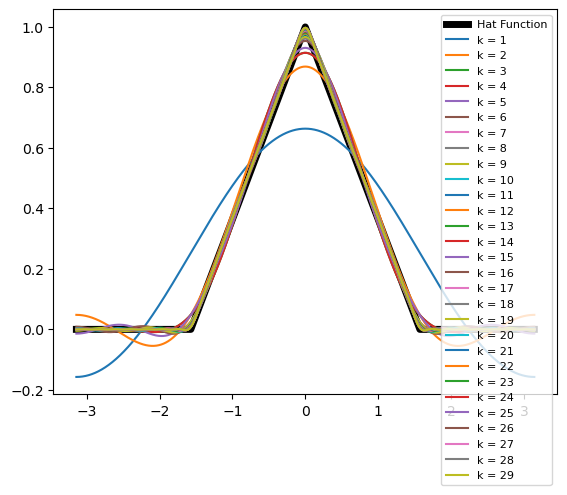

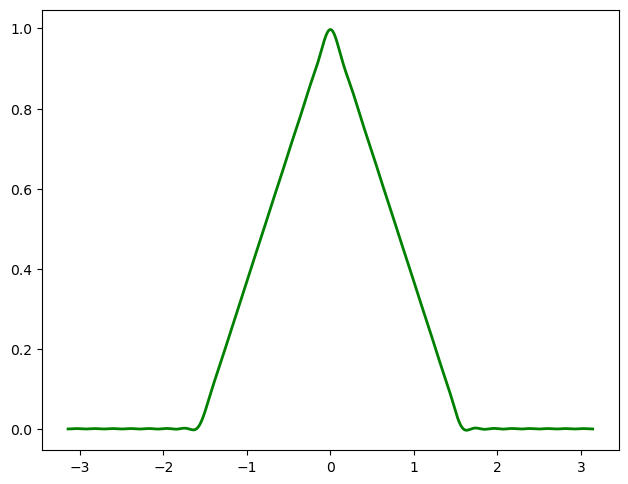

In [103]:
"""
Your task is to implement the Fourier series and compute it for the hat function, defined above.
""";

def compute_fs(n_fs, f):
    # The approximate Fourier series
    fs = 0.
    # initialize list to store the fs value for plotting
    fs_list = [0.0] * len(x)
    # Fourier coefficients
    A = [0] * n_fs
    B = [0] * n_fs
    # Define the resolution of the discretization
    n_res = 100
    # Define the step size
    idx = int(len(f)/n_res)
    # Define the maximum and minimum range
    T = max(x) - min(x)
    # Compute A0
    sum_A0 = 0
    for i in range(0, len(x)-1, idx):
        sum_A0 += (2 / T) * f[i] * (T / n_res) # code here
    A[0] = sum_A0
    # Note that B[0] is equal to zero
    # Add A[0] to the approximate Fourier series
    fs_list = [A[0]/2] * len(x) # Code 
    # Compute the Fourier coefficients
    for k in range(1, n_fs):
        sum_cos = 0.0
        sum_sin = 0.0
        for j in range(0, len(f)-1, idx):
            sum_cos += f[j] * math.cos(2 * math.pi * x[j] * k / T)
            sum_sin += f[j] * math.sin(2 * math.pi * x[j] * k / T)
        # Compute A[k]
        A[k] = (2 / T) * sum_cos * (T / n_res) # Code here
        # Compute B[k]
        B[k] = (2 / T) * sum_sin * (T / n_res) # Code here
        """print("-----------------------")
        print(f"For value k of {k}: ")
        print(f"A[k] = {A[k]}")
        print(f"B[k] = {B[k]}")
        print("-----------------------")"""
        # Update Fourier series
        for j in range(len(x)):
            fs_list[j] += A[k] * math.cos(2 * math.pi * x[j] * k / T) + B[k] * math.sin(2 * math.pi * x[j] * k / T)
        #fs += # Code here
        # Plot Fourier series up to coefficient k
        ax.plot(x, fs_list, label = f"k = {k}")
    
    ax.legend(fontsize = 8)
    plt.tight_layout()

    return A, B, fs_list

# The length of the approximate Fourier series
n_fs = 30
# Create figure
fig, ax = plt.subplots(figsize=(6.5,5))
fig, ax2 = plt.subplots(figsize=(6.5,5))
# Plot hat function
ax.plot(x, f, '-', color = "black", linewidth = 5, label = "Hat Function")
# Compute the Fourier series and plot it
A, B, fs_list = compute_fs(n_fs, f)
ax2.plot(x, fs_list, '-', color = "Green", linewidth = 2, label = "Fs List")

Try to answer the following questions:

- What happens as the series becomes larger, i.e., as you add more sines and cosines?
- Where is the series most and least accurate?
- Do you observe a similar pattern for the inaccuracies?

Your next task is to look at the Fourier coefficients you just computed. Remember that a given coefficient $c_{k}$ determines *how much* of the $k$-th frequency is added to the Fourier signal. Intuitively, this feeds well into the notion of projection and change of basis in the sense that the *closer* the original signal is to a given frequency, the dot product between them and, consequently, the corresponding Fourier coefficient would be larger.

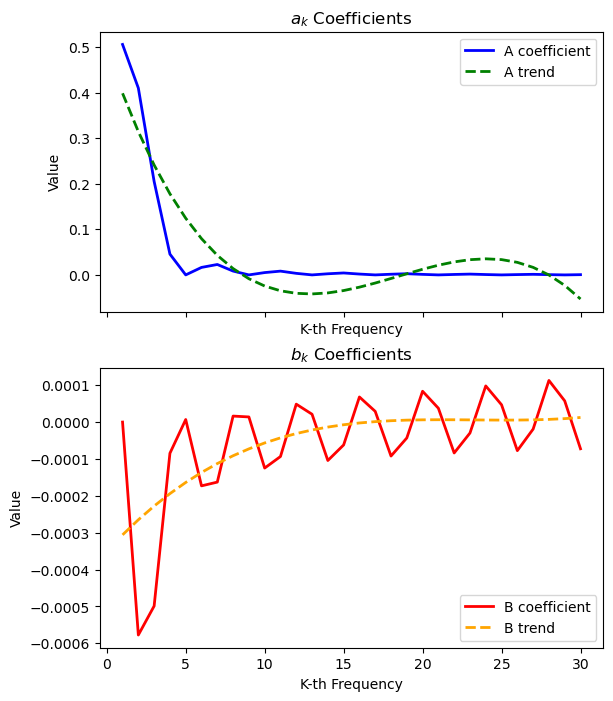

In [133]:
"""
Your task is to plot the Fourier coefficients computed above
""";
import numpy as np

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.5, 8), sharex=True)

# Code here
x_axis = list(range(1, n_fs + 1))
# Use regression to make some trend line
coeffs_A = np.polyfit(x_axis, A, 3)       # fit coefficients
A_trend = np.polyval(coeffs_A, x_axis)    # evaluate polynomial at x_axis
ax1.plot(x_axis, A, '-', color="blue", linewidth=2, label="A coefficient")
ax1.plot(x_axis, A_trend, '--', color="green", linewidth=2, label="A trend")
ax1.legend()
ax1.set_title("$a_k$ Coefficients")
ax1.set_ylabel("Value")
ax1.set_xlabel("K-th Frequency")

coeffs_B = np.polyfit(x_axis, B, 3)
B_trend = np.polyval(coeffs_B, x_axis)
ax2.plot(x_axis, B, '-', color = "Red", linewidth = 2, label = "B coefficient")
ax2.plot(x_axis, B_trend, '--', color="orange", linewidth=2, label="B trend")
ax2.set_title("$b_k$ Coefficients")
ax2.set_ylabel("Value")
ax2.set_xlabel("K-th Frequency")
ax2.legend()

## Complex Number Implementation
Here, I will try to implement the complex number that I have implemented in order to the fourier series using the complex number.

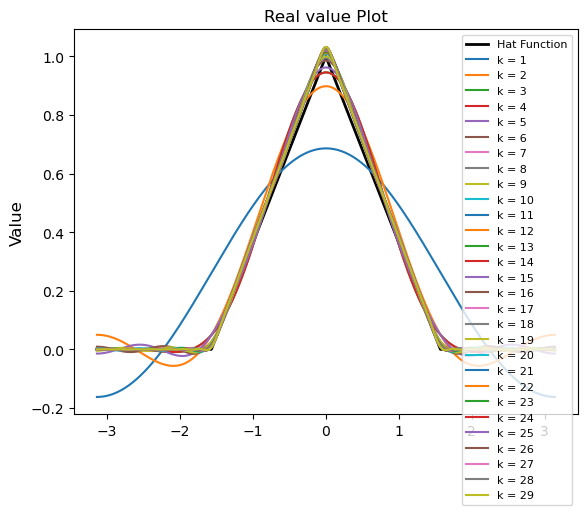

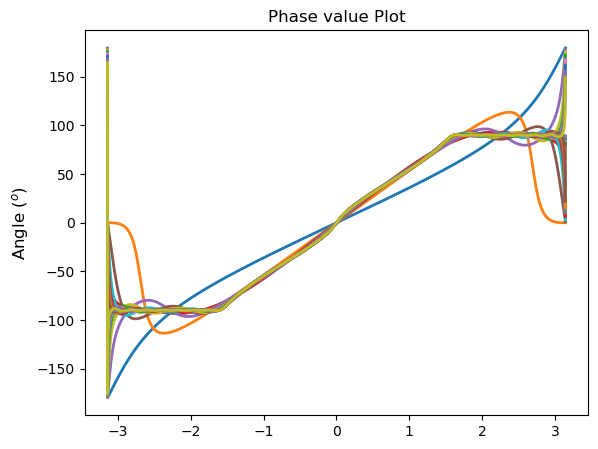

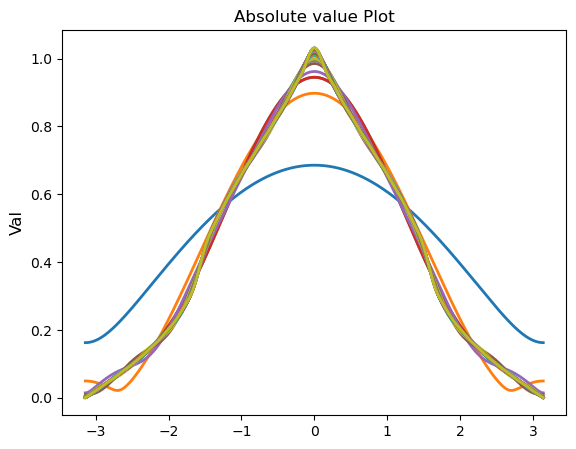

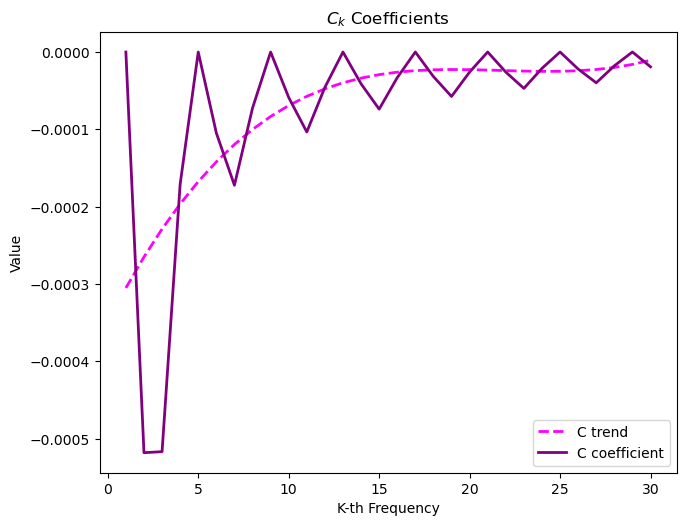

In [137]:
import math
import matplotlib.pyplot as plt

class Complex:
    # Constructor
    # Initializes the complex number to given real and imaginary parts
    # Default values are zero for both the real and imaginary parts
    def __init__(self,r = 0., i = 0.): # When we are making the object by inserting argument, it will call the __init__
        """
        Take two argumens, Complex(r, i). Where r=real, i=imaginary
        """
        # Initialize complex number
        self.r = r
        self.i = i
        
    # String conversion
    # Convert the complex number to string
    def __str__(self):
        # Code here
        return f'{self.r} + {self.i}i'

    # Addition
    # Returns the sum of two complex numbers
    def __add__(self, other):
        # Code here
        if isinstance(other, Complex):
            a = self.r + other.r
            b = self.i + other.i    
            return Complex(a, b)
        if isinstance(other, (float, int)):
            a = self.r + other
            b = self.i
            return Complex(a, b)
        return NotImplemented

    def __radd__(self, other):
        return self.__add__(other)

    def __iadd__(self, other):
        if isinstance(other, Complex):
            self.r += other.r
            self.i += other.i
            return self
        if isinstance(other, (float, int)):
            self.r += other
            return self
        return NotImplemented
        
    # Subtraction
    # Subtracts a given complex number from the current object and
    # returns the result
    def __sub__(self, other):
        # Code here
        a = self.r - other.r
        b = self.i - other.i
        return Complex(a, b)

    # Multiplication
    # Multiplies two complex numbers and returns the result
    def __mul__(self, other):
        # Code here
        #a = self.r * other.r - self.i * other.i
        #b = self.r * other.i + self.i * other.r

        # Make multiplication two sequence for complex and real number
        if isinstance(other, Complex):
            a = self.r * other.r - self.i * other.i
            b = self.r * other.i + self.i * other.r
            return Complex(a, b)
        if isinstance(other, (float, int)):
            a = other * self.r
            b = other * self.i            
            return Complex(a, b)

        return NotImplemented

    def __rmul__(self, other):
        return self.__mul__(other)

    # Conjugation
    # Compute the conjugate of the complex number
    def conjugate(self):
        # Code here
        a = self.r
        b = -self.i
        return Complex(a, b)

    # Absolute value
    # Computes and returns the absolute value of the
    # complex number
    def abs(self):
        # Code here
        return math.sqrt(self.r * self.r + self.i * self.i)

    def phase(self):
        # Convert the phase into angle
        return math.atan2(self.i, self.r) * 180/math.pi

    def normalize(self):
        """
        Normalize is used to obtain the cos(theta) + isin(theta) terms
        """
        # Take the absolute value
        radius = Complex(self.r, self.i).abs()
        # Calculate the new normalize value for each component
        a = self.r / radius
        b = self.i / radius
        norm = Complex(a, b)
        return norm


    def rotate(self, phase):
        """
        The more efficient way
        """
        # Initialize normalized complex number
        z = Complex(self.r, self.i).normalize()
        # Extract the absolute value
        z_abs = Complex(self.r, self.i).abs()
        # Convert the phase using angle radius
        rad = phase * math.pi/180
        # Calculate the rotated complex number component
        a_new = (z.r * math.cos(rad) - z.i * math.sin(rad)) * z_abs # using cos(a+b) = cos(a)cos(b) - sin(a)sin(b)
        b_new = (z.i * math.cos(rad) + z.r * math.sin(rad)) * z_abs # using sin(a+b) = sin(a)cos(b) + cos(a)sin(b)
        # Convert it back to complex number
        return Complex(a_new, b_new)

    def rotate_old(self, phase):
        """
        Please enter the phase between 0 to 360 degree angle
        """
        # Initialize the complex number with the normalize one
        z = Complex(self.r, self.i).normalize()
        z_norm = Complex(self.r, self.i).abs()
        # Extract the normalize component from it
        a = z.r # equivalent value as cos(theta_old)
        b = z.i # equivalent value as sin(theta_old)
        # Convert phase angle to radian
        rad = phase * math.pi/180
        # Calculate with the new angle
        a_new = (a * math.cos(rad) - b * math.sin(rad)) * z_norm
        b_new = (b * math.cos(rad) + a * math.sin(rad)) * z_norm
        # Convert it back to the complex number
        return Complex(a_new, b_new)

def compute_fs_Complex(nfs, f):
    """
    This version will try seperate both real and imagenary part
    """
    # initialize placeholder for the fs real and imagenary
    fs_real = [0] * len(x)
    fs_imag = [0] * len(x)
    # initialize list to store the fs value for plotting
    fs_list = [Complex(0, 0) for _ in range(len(x))]
    # Fourier coefficients
    C_r = [0] * n_fs
    C_i = [0] * n_fs
    # Initialize fourier coefficient
    C = [Complex(0, 0) for _ in range(n_fs)]
    # Define the resolution of the discretization
    n_res = 1000
    # Define the step size
    idx = int(len(f)/n_res)
    # Define the maximum and minimum range
    T = max(x) - min(x) 
    # Compute C0
    sum_C0 = 0
    for i in range(0, len(x)-1, idx):
        sum_C0 += (1 / T) * f[i] * (T / n_res)
    C[0] = Complex(sum_C0, 0)
    # Add C[0] to the approximate Fourier series
    fs_list = [Complex(C[0].r, C[0].i) for _ in range(len(x))]
    # Compute the Fourier coefficients
    for k in range(1, n_fs):
        # Compute Ck (for 1st loop)
        sum_c_r = 0.0
        sum_c_i = 0.0
        for i in range(0, len(f)-1, idx):
            a = 2 * math.pi * k * x[i] / T # Placeholder for the angle
            sum_c_r += f[i] * math.cos(a)
            sum_c_i += f[i] * math.sin(a)
        # Compute C[k]
        C_r[k] = 2 / T * sum_c_r * T / n_res
        C_i[k] = 2 / T * sum_c_i * T / n_res
        C[k] = Complex(C_r[k], C_i[k])
        # Update fourier series (for 2nd loop)
        for j in range(len(x)):
            # Seperate the result first
            real = math.cos(2 * math.pi * x[j] * k / T)
            imagin = math.sin(2 * math.pi * x[j] * k / T)
            # Operate the calculation
            fs_list[j] += C[k] * Complex(real, imagin)
            
        real = [z.r for z in fs_list]
        imagin = [z.i for z in fs_list]
        # Plot the phase value
        plotted_phase = [z.phase() for z in fs_list]
        # Plot the abs value
        absolute_value = [z.abs() for z in fs_list]
        # Plotting function
        ax.plot(x, real, label = f"k = {k}")
        ax2.plot(x, plotted_phase, linewidth = 2, label = f"k = {k}")
        ax3.plot(x, absolute_value, linewidth = 2, label = f"k = {k}")
    ax.legend(fontsize = 8)
    plt.tight_layout()

    return C, fs_list

# The length of the approximate Fourier series
n_fs = 30
# Create figure
fig, ax = plt.subplots(figsize=(6.5,5))
fig, ax2 = plt.subplots(figsize=(6.5,5))
fig, ax3 = plt.subplots(figsize=(6.5,5))
fig, ax4 = plt.subplots(figsize=(6.5,5))
# Plot hat function
ax.plot(x, f, '-', color = "black", linewidth = 2, label = "Hat Function")
ax.set_title("Real value Plot")
ax.set_ylabel("Value", fontsize=12)
# Compute the Fourier series and plot it
C, fs_list = compute_fs_Complex(n_fs, f)
# 2nd Plot
ax2.set_title("Phase value Plot")
ax2.set_ylabel("Angle ($^o$)", fontsize=12)
# 3rd Plot
ax3.set_title("Absolute value Plot")
ax3.set_ylabel("Val", fontsize=12)
# 4th Plot: Ck Coefficient
x_axis = list(range(1, n_fs + 1))
C_value = [z.i for z in C]
# Plot the regression curve
coeffs_C = np.polyfit(x_axis, C_value, 3)
C_trend = np.polyval(coeffs_C, x_axis)
ax4.plot(x_axis, C_trend, '--', color="magenta", linewidth=2, label="C trend")
ax4.plot(x_axis, C_value, '-', color = "Purple", linewidth = 2, label = "C coefficient")
ax4.set_title("$C_k$ Coefficients")
ax4.set_ylabel("Value")
ax4.set_xlabel("K-th Frequency")
ax4.legend()

Try to answer the following questions:

- How do the coefficients evolve?
- Is there a pattern to what you observe?

Copyright 2024 &copy; Manuel Saberi, High Performance Computing, Ruhr University Bochum. All rights reserved. No part of this notebook may be reproduced, distributed, or transmitted in any form or by any means, including photocopying, recording, or other electronic or mechanical methods, without the prior written permission of the publisher.